In [2]:
import pandas as pd
import matplotlib.pyplot as plt

movement = pd.read_csv('https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv')
#resilience = pd.read_csv('https://www2.census.gov/data/experimental-data-products/community-resilience-estimates/2020/cre-2018-a11.csv')
movement.head()
column_names = list(movement)
print(column_names)



/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


['country_region_code', 'country_region', 'sub_region_1', 'sub_region_2', 'metro_area', 'iso_3166_2_code', 'census_fips_code', 'date', 'retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline', 'parks_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline', 'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline']


In [3]:
explore1 = 'residential_percent_change_from_baseline'
movement = movement[['country_region', 'sub_region_1','sub_region_2','date', explore1]]

movement = movement[movement.country_region == 'United States']

smallBiz = pd.read_csv('https://raw.githubusercontent.com/OpportunityInsights/EconomicTracker/main/data/Womply%20Merchants%20-%20City%20-%20Daily.csv')
smallBiz.head()
cities = pd.read_csv('https://raw.githubusercontent.com/Airrobo/EconomicTracker/main/data/GeoIDs%20-%20City.csv')
match = pd.merge(cities, smallBiz, left_on='cityid', right_on='cityid')
match.head()



,cityid,cityname,stateabbrev,statename,statefips,city_pop2019,year,month,day,merchants_all,merchants_ss40,merchants_ss60,merchants_ss65,merchants_ss70
0,1,Los Angeles,CA,California,6,10039107,2020,1,10,-0.00553,-0.00250,-0.01140,-0.01320,0.000103
1,1,Los Angeles,CA,California,6,10039107,2020,1,11,-0.00546,-0.00629,0.00409,-0.00917,0.000160
2,1,Los Angeles,CA,California,6,10039107,2020,1,12,-0.00845,-0.01120,-0.00158,-0.00880,-0.000367
3,1,Los Angeles,CA,California,6,10039107,2020,1,13,-0.01210,-0.01680,-0.00422,-0.01100,-0.004310
4,1,Los Angeles,CA,California,6,10039107,2020,1,14,-0.01000,-0.01580,-0.00655,-0.00159,-0.004330


In [5]:
from google.colab import drive

drive.mount('/content/gdrive')

mobility = pd.read_csv('/content/gdrive/My Drive/Columbia Data Science Hackathon/Google-Mobility-City-Daily.csv')
mobility.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,year,month,day,cityid,gps_retail_and_recreation,gps_grocery_and_pharmacy,gps_parks,gps_transit_stations,gps_workplaces,gps_residential,gps_away_from_home
0,2020,2,24,1,0.00571,-0.00286,.0714,.00286,0.0214,-0.00143,0.000625
1,2020,2,24,2,0.02000,-0.02410,.139,-.0206,-0.0326,0.01160,-0.009070
2,2020,2,24,3,0.04000,0.02710,.281,.0329,0.0257,-0.00857,0.014700
3,2020,2,24,4,0.02140,-0.00714,.00286,-.00286,0.0229,0.00286,-0.002060
4,2020,2,24,5,0.03290,-0.00143,.0386,.0471,0.0100,0.00286,-0.004610


In [6]:
!pip install --upgrade gspread

  Found existing installation: gspread 3.0.1
    Uninstalling gspread-3.0.1:
      Successfully uninstalled gspread-3.0.1


### **Reading From GSHeets**

In [8]:
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

worksheet = gc.open('cityname').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
print(rows)

# Convert to a DataFrame and render.
df = pd.DataFrame.from_records(rows)
df = df[1:]
df = df[[1,9]]
df = df[df[1] != 0]
df = pd.read_csv('/content/gdrive/My Drive/Columbia Data Science Hackathon/cityname - cityname.csv')
revenue = pd.read_csv('https://raw.githubusercontent.com/Airrobo/EconomicTracker/main/data/Womply%20Revenue%20-%20City%20-%20Daily.csv')

#all = df[['cityname', 'cityid','WFH','merchants_all']]





[['cityname', 'WFH', 'cityid', 'statefips', 'city_pop2019', 'year', 'month', 'day', 'merchants_all', 'merchants_ss40', 'merchants_ss60', 'merchants_ss65', 'merchants_ss70'], ['Albuquerque', '0', '32', '35', '679121', '2020', '5.128787879', '16.04166667', '-0.2255865042', '-0.1327787915', '-0.1383587127', '-0.2007631812', '-0.2656182424'], ['Atlanta', '174', '36', '13', '1063937', '2020', '5.128787879', '16.04166667', '-0.2177874698', '-0.1370729543', '-0.1538280677', '-0.2662804923', '-0.2520192422'], ['Austin', '161', '16', '48', '1273954', '2020', '5.128787879', '16.04166667', '-0.2288455717', '-0.1485547271', '-0.1292816521', '-0.1460525987', '-0.405234727'], ['Bakersfield', '0', '47', '6', '900202', '2020', '5.128787879', '16.04166667', '-0.2187198366', '-0.1571072345', '-0.1253715537', '-0.200211553', '-0.386442984'], ['Baltimore', '139', '23', '24', '827370', '2020', '5.128787879', '16.04166667', '-0.2672606093', '-0.2276517738', '-0.1927386097', '-0.284294675', '-0.3286858523'],

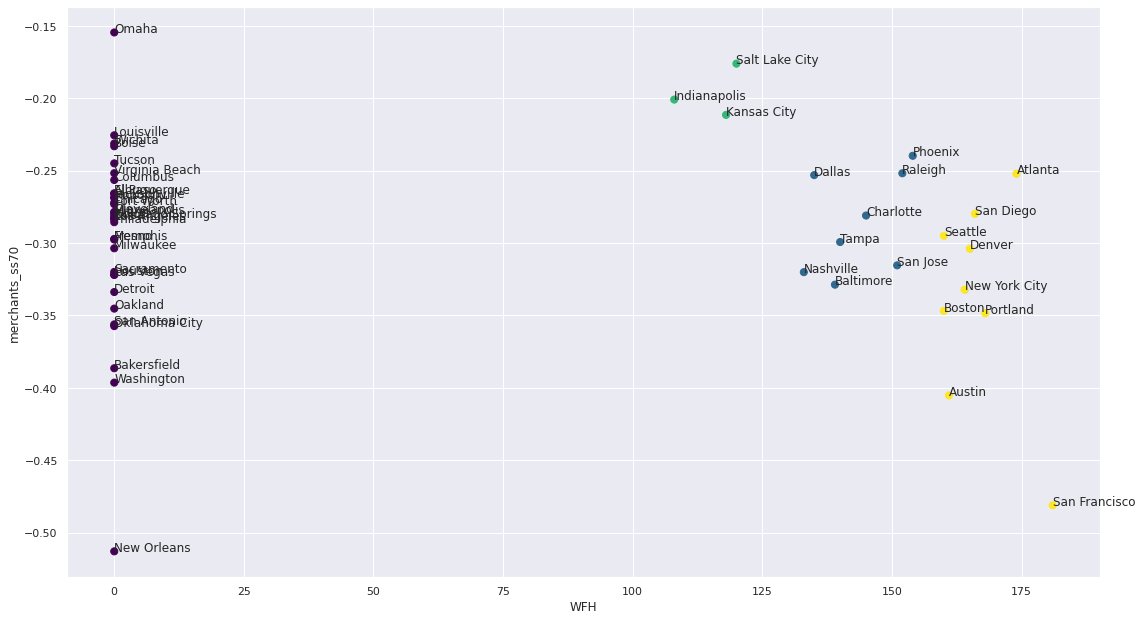

In [9]:
#Making clusters
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  #for plot styling
import numpy as np
from sklearn.cluster import KMeans


sns.scatterplot(x=df['WFH'], y=df['merchants_ss70'])
kmeans = KMeans(n_clusters=4)
cases =df[['WFH','merchants_ss70']]
kmeans.fit(df[['WFH','merchants_ss70']])
y_kmeans=kmeans.predict(df[['WFH','merchants_ss70']])

#annotating
#for i, name in enumerate(df['cityname']):
    #ax.annotate(name, (df['WFH')[i], df['merchants_ss60'][i]))
#ax = df.set_index('WFH')['merchants_ss60'].plot(style='o')

#def label_point(x, y, val, ax):
    #a = pd.concat({'WFH': x, 'merchants_ss60': y, 'cityname': val}, axis=1)
    #for i, point in a.iterrows():
       # ax.text(point['WFH'], point['merchants_ss60'], str(point['cityname']))

#label_point(df.x, df.y, df.val, ax)

plt.scatter(df['WFH'], df['merchants_ss70'], c=y_kmeans, s=50, cmap='viridis')
for i in range(df.shape[0]):
    plt.annotate(df.cityname.tolist()[i], (df.WFH.tolist()[i], df.merchants_ss70.tolist()[i]))
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

## Mobility vs. Revenue


In [10]:
mobility = pd.read_csv('https://raw.githubusercontent.com/Airrobo/EconomicTracker/main/data/Google%20Mobility%20-%20City%20-%20Daily.csv')
mobility.head()
all = pd.read_csv('https://raw.githubusercontent.com/Airrobo/EconomicTracker/main/data/Womply%20Revenue%20-%20City%20-%20Daily.csv')

is_covid = all['month'] >= 3
all = all[is_covid]
is_covid = mobility['month'] >= 3
mobility = mobility[is_covid]
all.head() 


,year,month,day,cityid,revenue_all,revenue_ss40,revenue_ss60,revenue_ss65,revenue_ss70
2703,2020,3,1,1,0.00849,0.0379,-0.0871,-0.0781,-0.00179
2704,2020,3,1,2,-0.01220,0.0670,-0.0496,-0.0448,-0.06550
2705,2020,3,1,3,-0.04310,0.1310,-0.0477,-0.2480,-0.06560
2706,2020,3,1,4,-0.02140,0.0705,-0.0626,-0.1350,-0.08370
2707,2020,3,1,5,-0.02760,0.1160,-0.1260,-0.0564,-0.05350




# **Feature Engineering and Dataframe Merging**




In [11]:
new = pd.merge(mobility, all, left_on=['month', 'day','cityid'], right_on=['month','day','cityid'])
#new['gps_away_from_home'] = new['gps_away_from_home'] + 1
#new['revenue_all'] = new['revenue_all'] + 1
#new = new.groupby(['gps_away_from_home']).cumprod()
#new = new.groupby(['cityid']).cumprod()
cities = pd.read_csv('https://raw.githubusercontent.com/Airrobo/EconomicTracker/main/data/GeoIDs%20-%20City.csv')
new = pd.merge(cities, new, left_on='cityid', right_on='cityid')
new.groupby(['cityname'])
new.head(20)




,cityid,cityname,stateabbrev,statename,statefips,city_pop2019,year_x,month,day,gps_retail_and_recreation,gps_grocery_and_pharmacy,gps_parks,gps_transit_stations,gps_workplaces,gps_residential,gps_away_from_home,year_y,revenue_all,revenue_ss40,revenue_ss60,revenue_ss65,revenue_ss70
0,1,Los Angeles,CA,California,6,10039107,2020,3,1,0.02860,0.0214,.0886,.0129,0.02570,-0.00857,0.01000,2020,0.00849,0.03790,-0.08710,-0.0781,-0.00179
1,1,Los Angeles,CA,California,6,10039107,2020,3,2,0.03430,0.0300,.0886,.0114,0.02570,-0.00857,0.01000,2020,0.03970,0.05500,-0.07240,0.0225,0.00707
2,1,Los Angeles,CA,California,6,10039107,2020,3,3,0.04290,0.0386,.116,.01,0.02570,-0.00857,0.01000,2020,0.04860,0.05030,-0.08000,0.0713,0.00491
3,1,Los Angeles,CA,California,6,10039107,2020,3,4,0.04430,0.0443,.113,.00571,0.02430,-0.00714,0.00841,2020,0.04480,0.04430,-0.04270,0.0479,-0.00820
4,1,Los Angeles,CA,California,6,10039107,2020,3,5,0.04570,0.0514,.106,.00143,0.02430,-0.00571,0.00698,2020,0.03260,0.02120,-0.01850,0.0455,-0.02320
5,1,Los Angeles,CA,California,6,10039107,2020,3,6,0.04430,0.0543,.101,-.00429,0.02290,-0.00429,0.00559,2020,0.01890,0.01270,-0.00973,0.0149,-0.03430
6,1,Los Angeles,CA,California,6,10039107,2020,3,7,0.04140,0.0571,.09,-.01,0.02290,-0.00286,0.00309,2020,0.02430,0.00744,0.00179,0.0509,-0.04020
7,1,Los Angeles,CA,California,6,10039107,2020,3,8,0.04000,0.0586,.12,-.0114,0.02290,-0.00286,0.00309,2020,0.04640,0.01420,0.04160,0.1080,-0.04150
8,1,Los Angeles,CA,California,6,10039107,2020,3,9,0.03710,0.0614,.117,-.0186,0.02140,-0.00143,0.00140,2020,0.00680,-0.01050,0.03330,-0.0200,-0.06420
9,1,Los Angeles,CA,California,6,10039107,2020,3,10,0.02140,0.0557,.03,-.04,0.01430,0.00429,-0.00419,2020,-0.01830,-0.01060,0.02520,-0.0919,-0.07760


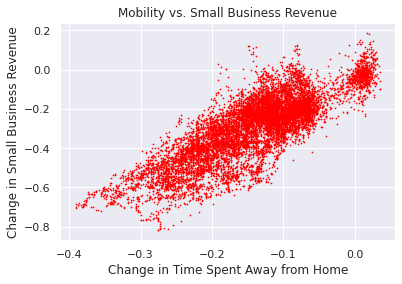

In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit([new['gps_away_from_home']], [new['revenue_all']])

plt.xlabel('Change in Time Spent Away from Home')
plt.ylabel('Change in Small Business Revenue')
plt.title('Mobility vs. Small Business Revenue')
#sns.set_theme(color_codes=True)
#tips = sns.load_dataset("tips")
#sns.regplot(x=new['gps_away_from_home'], y=new['revenue_all'], color='red',data=tips);
plt.scatter(new['gps_away_from_home'],new['revenue_all'],s=0.5, c='red')

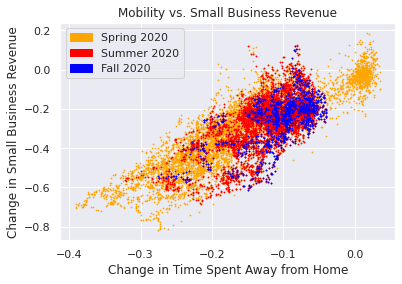

In [13]:
beginning = new['month'] >= 3 
beginning = new[beginning]
middle = new['month'] >= 6
middle = new[middle]
end = new['month'] >= 9
end = new[end]

c1 = 'orange'
c2 = 'red'
c3 = 'blue'

plt.xlabel('Change in Time Spent Away from Home')
plt.ylabel('Change in Small Business Revenue')
plt.title('Mobility vs. Small Business Revenue')
plt.scatter(beginning['gps_away_from_home'],beginning['revenue_all'],s=0.5, c=c1)
plt.scatter(middle['gps_away_from_home'],middle['revenue_all'],s=0.5, c=c2 )
plt.scatter(end['gps_away_from_home'],end['revenue_all'],s=0.5, c=c3)


import matplotlib.patches as mpatches
spring_patch = mpatches.Patch(color=c1, label='Spring 2020')
summer_patch = mpatches.Patch(color=c2, label='Summer 2020')
fall_patch = mpatches.Patch(color=c3, label='Fall 2020')
plt.legend(handles=[spring_patch,summer_patch,fall_patch])

plt.show()
plt.show()

    


Figure 1 shows the overall trend that a decrease in mobility by  percentage points results in a decrease in small business revenue, and Figure 2 shows the temporal distinctions within the points, which each represent a day in a major U.S. city

###Predicting SME Revenue Using Multivariate Linear Regression

In [14]:
import pickle
X = [-.1, -.1, .1, -.1]
with open('/content/gdrive/My Drive/duke datathon/Data_and_code/regression_model', 'rb') as file:
    pickle_model = pickle.load(file)
pickle_model.predict([X])

array([-0.13408557])

### **###Chloropleth Map**

Predicted Global SME Revenues Using Google Mobility GPS Data

In [15]:
pip install plotly==4.1.0

     |████████████████████████████████| 7.1MB 3.8MB/s 
ERROR: cufflinks 0.17.3 has requirement plotly>=4.1.1, but you'll have plotly 4.1.0 which is incompatible.
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [16]:
import plotly as py
import plotly.graph_objs as go
df = pd.read_csv("/content/gdrive/My Drive/duke datathon/Data_and_code/smallbiz_revenue_country_predictions.csv")
df.head()


,Country,Small Business Revenue Prediction
0,United Arab Emirates,-0.201499
1,Afghanistan,-0.051081
2,Antigua and Barbuda,-0.167986
3,Angola,-0.176316
4,Argentina,-0.288201


In [20]:
data = dict (
    type = 'choropleth',
    locations = df['Country'],
    locationmode='country names',
    colorscale = 'Blues',
    z=df['Small Business Revenue Prediction'])

map = go.Figure(data=[data])
layout = dict(title = 'Average High and Low Temperatures in New York',
              xaxis = dict(title = 'Month'),
              yaxis = dict(title = 'Temperature (degrees F)'),
              )
from google.colab import files
#downloads the chloropleth map in html format
files.download(py.offline.plot(map,layout)) 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>